# Data Augmentation

### Imbalanced data for balancing class
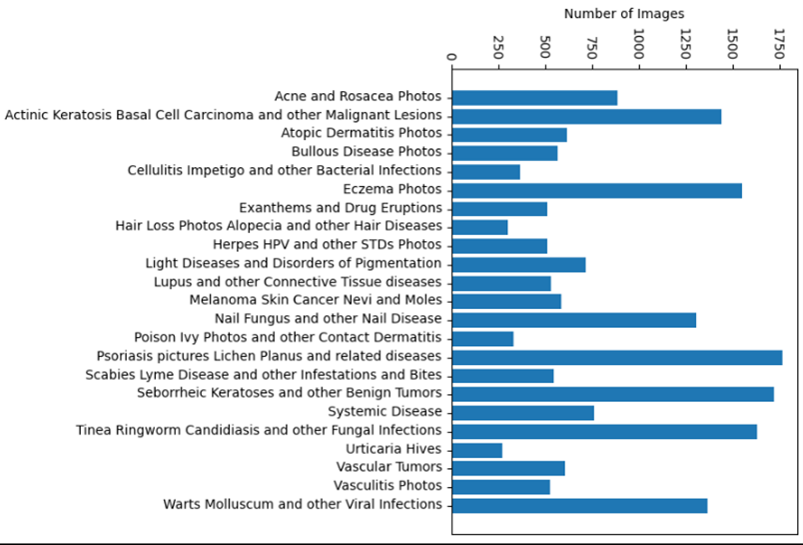
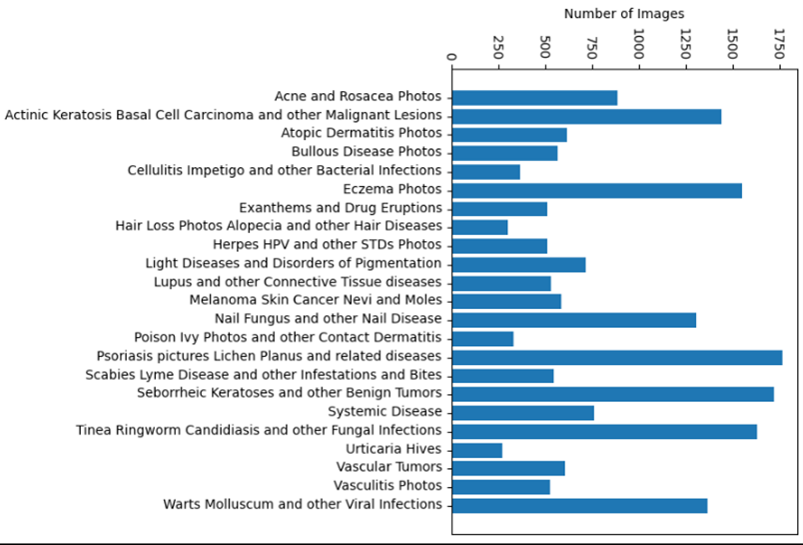

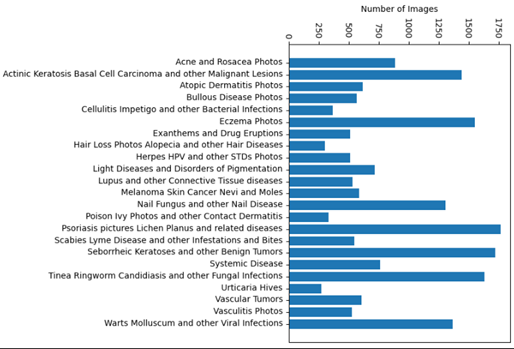

## Installation and Initiation Package

### Install imgaug

In [2]:
!pip install imgaug

     ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/948.0 kB ? eta -:--:--
     - ----------------------------------- 30.7/948.0 kB 262.6 kB/s eta 0:00:04
     - ----------------------------------- 30.7/948.0 kB 262.6 kB/s eta 0:00:04
     -- ---------------------------------- 61.4/948.0 kB 363.1 kB/s eta 0:00:03
     -- ---------------------------------- 61.4/948.0 kB 363.1 kB/s eta 0:00:03
     --- --------------------------------- 92.2/948.0 kB 435.7 kB/s eta 0:00:02
     ---- ------------------------------- 122.9/948.0 kB 450.6 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/948.0 kB 472.1 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/948.0 kB 472.1 kB/s eta 0:00:02
     ------ ----------------------------- 174.1/948.0 kB 455.1 kB/s eta 0:00:02
     ------ ----------------------------- 174.1/948.0 kB 455

In [4]:
!pip install imagecorruptions

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 991.0 kB/s eta 0:00:03
      --------------------------------------- 0.0/2.1 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/2.1 MB 409.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/2.1 MB 393.8 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/2.1 MB 554.9 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.1 MB 700.2 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/2.1 MB 811.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.3/2.1 MB 896.4 kB/s eta 0:00:03
     

In [6]:
!pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio
!pip install --no-dependencies imgaug

### Initiation

In [1]:
data_path = r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset"
val_path_dataset2 = r"C:\Users\SMSK_Narinda\Desktop\Research\dataset2\val"
train_path_dataset2 = r"C:\Users\SMSK_Narinda\Desktop\Research\dataset2\train"
test_path_dataset2 = r"C:\Users\SMSK_Narinda\Desktop\Research\dataset2\test"

In [2]:
img_size = 200

In [3]:
import numpy as np
import pandas as pd
import os
import cv2

In [4]:
from imgaug import augmenters as iaa
from sklearn.utils import shuffle

## Checkpoint

### Reset Folder

Ini buat nyisain satu folder satu gambar aja. Buat contoh augmentasi gambar dan jumlahnya.

In [77]:
def remove_image(dir_path):
    for label in os.listdir(dir_path):
        label_path = os.path.join(dir_path, label)
        if os.path.isdir(label_path):
            files = os.listdir(label_path)
            if len(files) > 1:
                for i in range(1, len(files)):
                    file_path = os.path.join(label_path, files[i])
                    os.remove(file_path)

In [78]:
remove_image(try_path)

### Cek Hasil

Ini buat ngecek jumlah citra per kelas di dalam folder.

In [5]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

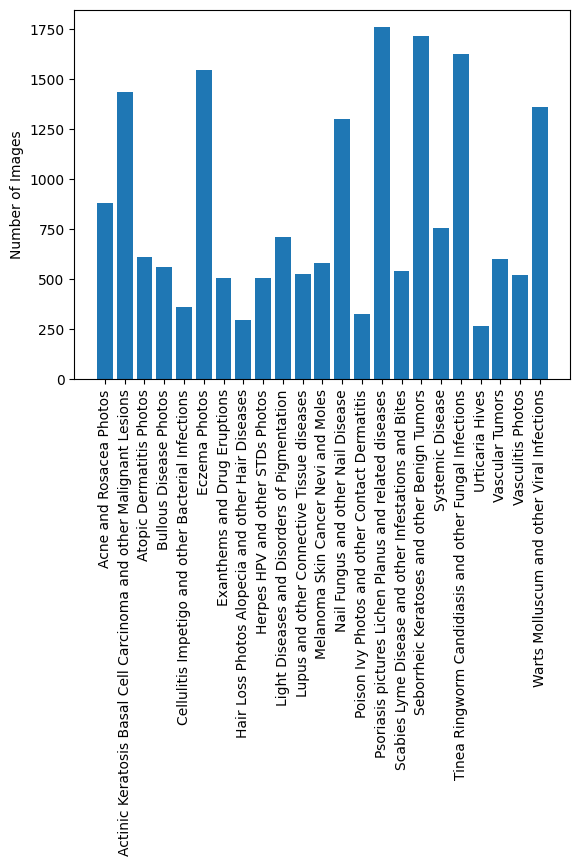

In [17]:
subdirectories = [os.path.join(data_path, d) for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Count the number of images in each subdirectory
counts = [0] * len(subdirectories)
for i, directory in enumerate(subdirectories):
    counts[i] = len(os.listdir(directory))

label_kategori = os.listdir(data_path)

# Create a bar chart to visualize the distribution
plt.bar(label_kategori, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

## Augmentation

### Augmentation

In [9]:
def get_images(dir):
  Images = []
  Labels = []

  for label in os.listdir(dir):
    label_path = os.path.join(dir, label)
    for image_file in os.listdir(label_path):
      image = cv2.imread(os.path.join(label_path, image_file))
      image = cv2.resize(image, (img_size, img_size))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      Images.append(image)
      Labels.append(label)

  return shuffle(Images, Labels)

In [21]:
# for batch in range(10):
#     images = get_images(try_path)
#     iamges_aug = seq(images=images)
#     train_on_images(images_aug)
def augment_and_save_images(dir, save_dir, img_size=224, max_images=1000):
    # Membuat direktori untuk menyimpan hasil augmentasi
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Augmentasi berbagai pola
    seqs = [
        iaa.Fliplr(0.5), # horizontal flips
        iaa.Crop(percent=(0, 0.1)), # random crops
        # Small gaussian blur with random sigma between 0 and 0.5.
        # But we only blur about 50% of all images.
        iaa.Sometimes(
            0.5,
            iaa.GaussianBlur(sigma=(0, 0.5))
        ),
        # Strengthen or weaken the contrast in each image.
        iaa.LinearContrast((0.75, 1.5)),
        # Add gaussian noise.
        # For 50% of all images, we sample the noise once per pixel.
        # For the other 50% of all images, we sample the noise per pixel AND
        # channel. This can change the color (not only brightness) of the
        # pixels.
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
        # Make some images brighter and some darker.
        # In 20% of all cases, we sample the multiplier once per channel,
        # which can end up changing the color of the images.
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        # Apply affine transformations to each image.
        # Scale/zoom them, translate/move them, rotate them and shear them.
        iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-25, 25),
            shear=(-8, 8)
        )]

    num_augmentations = max_images // len(seqs)  # Jumlah augmentasi per pola
    remainder = max_images % len(seqs)  # Sisa augmentasi untuk diproses secara acak

    for label in os.listdir(dir):
        print("[INFO] Processing label:", label)
        label_path = os.path.join(dir, label)
        label_save_path = os.path.join(save_dir, label)
        if not os.path.exists(label_save_path):
            os.makedirs(label_save_path)

        images = [os.path.join(label_path, img) for img in os.listdir(label_path) if img.endswith(".jpg")]
        num_images = len(images)

        # Jika gambar kurang dari 1000, kami akan melakukan augmentasi pada gambar yang ada
        if num_images < max_images:
            additional_images_needed = max_images - num_images
            selected_images = images * (additional_images_needed // num_images) + images[:additional_images_needed % num_images]
        else:
            selected_images = images * (max_images // num_images) + images[:max_images % num_images]

        for image_file in selected_images:
            image = cv2.imread(image_file)
            image = cv2.resize(image, (img_size, img_size))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Memasukkan gambar asli ke dalam dataset
            cv2.imwrite(os.path.join(label_save_path, os.path.basename(image_file)), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

            # Melakukan augmentasi pada gambar
            for seq in seqs:
                for _ in range(num_augmentations):
                    augmented_image = seq.augment_image(image)
                    cv2.imwrite(os.path.join(label_save_path, f"{os.path.basename(image_file)[:-4]}_aug.jpg"), cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

            # Menggunakan augmentasi sisa secara acak
            for i in range(remainder):
                seq_index = i % len(seqs)
                augmented_image = seqs[seq_index].augment_image(image)
                cv2.imwrite(os.path.join(label_save_path, f"{os.path.basename(image_file)[:-4]}_aug_{i}.jpg"), cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

            # Cek jumlah gambar setelah augmentasi
            augmented_images = [os.path.join(label_save_path, img) for img in os.listdir(label_save_path) if img.endswith(".jpg") or img.endswith(".png")]
            augmented_image_count = len(augmented_images)
    
            # Hentikan augmentasi jika jumlah gambar setelah augmentasi > 2000
            if augmented_image_count > 2000:
                print("[INFO] Jumlah total", augmented_image_count)
                print("Augmentation stopped")
                break

In [ ]:
augment_and_save_images(data_path, data_path)

[INFO] Processing label: Acne and Rosacea Photos
[INFO] Jumlah total 2002
Augmentation stopped
[INFO] Processing label: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
[INFO] Jumlah total 2005
Augmentation stopped
[INFO] Processing label: Atopic Dermatitis Photos
[INFO] Jumlah total 2005
Augmentation stopped
[INFO] Processing label: Bullous Disease Photos


In [124]:
# BUAT SENDIRI; LATIHAN
# def augmentation(dir, save_dir, img_size=224, target_images=1000):
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)

#     seq = iaa.Sequential([
#         iaa.Fliplr(0.5),
#         iaa.CropAndPad(percent=(-0.1,0.1)),
#         iaa.GaussianBlur(sigma=(0, 1)),
#         iaa.LinearContrast((0.75, 1.5)),
#         iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),
#         iaa.Multiply((0.8, 1.2), per_channel=0.2),
#         iaa.Affine(
#                     scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
#                     translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
#                     rotate=(-25, 25),
#                     shear=(-8, 8)
#                 )
#         ])

#     for label in os.listdir(dir):
#         print("[INFO] Processing on label:", label)
#         label_path = os.path.join(dir, label)
#         label_save_path = os.path.join(save_dir, label)
#         if not os.path.exists(label_save_path):
#             os.makedirs(label_save_path)
            
#         images = [os.path.join(label_path, img) for img in os.listdir(label_path) if img.endswith(".jpg")]
#         num_images = len(images)
#         print("[INFO] Jumlah gambar awal: ", num_images)
        
#         for image_file in images:
#             image = cv2.imread(image_file)
#             image = cv2.resize(image, (img_size, img_size))
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#             # Memasukkan gambar asli ke dalam dataset
#             cv2.imwrite(os.path.join(label_save_path, os.path.basename(image_file)), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

#             # Melakukan augmentasi pada gambar
#             augmented_images = [seq.augment_image(image) for _ in range(target_images)]

#             # Menyimpan gambar-gambar hasil augmentasi
#             for idx, augmented_image in enumerate(augmented_images):
#                 cv2.imwrite(os.path.join(label_save_path, f"{os.path.basename(image_file)[:-4]}_aug_{idx}.jpg"), cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

#             # Memeriksa jumlah gambar setelah augmentasi
#             augmented_image_count = len(os.listdir(label_save_path))
#             if augmented_image_count > 410:
#                 print("[INFO] Jumlah total", augmented_image_count)
#                 print("Augmentation stopped")
#                 break

In [128]:
# augmentation(val_path_dataset2, val_path_dataset2)